In [122]:
#Source of data
#https://www.kaggle.com/code/poonamdasilva/delivery-time-prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from geopy.distance import geodesic



In [123]:
df_train = pd.read_csv(r"E:\ProjectMaterial\train.csv")
df_train

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [124]:
# DATA ANALYSIS
df_train.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [125]:
df_train.size

911860

In [126]:
df_train.shape

(45593, 20)

In [127]:
df_train.info

<bound method DataFrame.info of             ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0      0x4607     INDORES13DEL02                   37                     4.9   
1      0xb379     BANGRES18DEL02                   34                     4.5   
2      0x5d6d     BANGRES19DEL01                   23                     4.4   
3      0x7a6a    COIMBRES13DEL02                   38                     4.7   
4      0x70a2     CHENRES12DEL01                   32                     4.6   
...        ...                ...                 ...                     ...   
45588  0x7c09      JAPRES04DEL01                   30                     4.8   
45589  0xd641      AGRRES16DEL01                   21                     4.6   
45590  0x4f8d     CHENRES08DEL03                   30                     4.9   
45591  0x5eee    COIMBRES11DEL01                   20                     4.7   
45592  0x5fb2   RANCHIRES09DEL02                   23                     4.9

In [128]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [129]:
for i in df_train.columns:
    print(i,end = ',')

ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),

In [130]:
#DATA CLEANING
df_train.isna().sum()


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [131]:
#FINDING ALL TYPES OF NULL VALUES, STORING IN SET null_types
df_train=df_train.astype(str)
null_types=set()
for column in df_train.columns:
    unique_vals=df_train[column].unique()
    for val in unique_vals:
        if 'nan' in val.lower():
            null_types.add(val)
print(null_types)


{'conditions NaN', 'NaN '}


In [132]:
#CORRECTING NULL VALUES TO np.nan
for na_value in null_types:
    df_train.replace(na_value,np.nan, inplace = True)



In [133]:
df_train.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [134]:
df_train.dropna(inplace=True)


In [135]:

df_train['Time_taken(min)'] = df_train['Time_taken(min)'].str.split(" ", expand=True)[1]
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition',
            'multiple_deliveries','Time_taken(min)']
for col in num_cols:
    df_train[col] = df_train[col].astype('float64')

## Converting Order_Date column to datetime date format
df_train['Order_Date'] = pd.to_datetime(df_train['Order_Date'], format = "%d-%m-%Y")


In [136]:
#CREATING NEW COLUMN FILLED WITH ZEROS
df_train['distance']=np.zeros(len(df_train))

In [137]:
# Computing distance from restaurant to delivery location using lat and long and making a new column named 'distance_km'

from geopy.distance import geodesic 
import gc

restaurant_cordinates = df_train[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates = df_train[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
for i in range(len(df_train)):
    df_train['distance'].loc[i]=geodesic(restaurant_cordinates[i],delivery_location_cordinates[i])



C:\Users\user\AppData\Local\Temp\ipykernel_5552\2398951925.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['distance'].loc[i]=geodesic(restaurant_cordinates[i],delivery_location_cordinates[i])
C:\Users\user\AppData\Local\Temp\ipykernel_5552\2398951925.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['distance'].loc[i]=geodesic(restaurant_cordinates[i],delivery_location_cordinates[i])
C:\Users\user\AppData\Local\Temp\ipykernel_5552\2398951925.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

In [138]:
# Dropping unwanted columns
df_train = df_train.drop(columns = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude','Time_Orderd','Time_Order_picked'] )



In [139]:
# Converting to string to remove ' km'
df_train['distance'] = df_train['distance'].astype(str).str[:-3].replace('',0)
# Converting to float and rounding off
df_train['distance'] = df_train['distance'].astype(float).round(2)

In [140]:
# Dropping entries with distance equal to 0 or more than 25

# index of rows that have distance equal to 0 or greater than 25 km
index_to_drop = df_train[(df_train['distance'] == 0) | (df_train['distance'] > 25)].index

df_train.drop(index_to_drop, inplace = True)

In [141]:
# Adding column for avg_speed

df_train['avg_speed_kmph'] = round(df_train['distance']*60 / df_train['Time_taken(min)'])

In [142]:
#Exploratory Data Analysis
edal_df = df_train.copy()

C:\Users\user\AppData\Local\Temp\ipykernel_5552\1843169463.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edal_df.corr(), annot=True, linewidth=0.1)


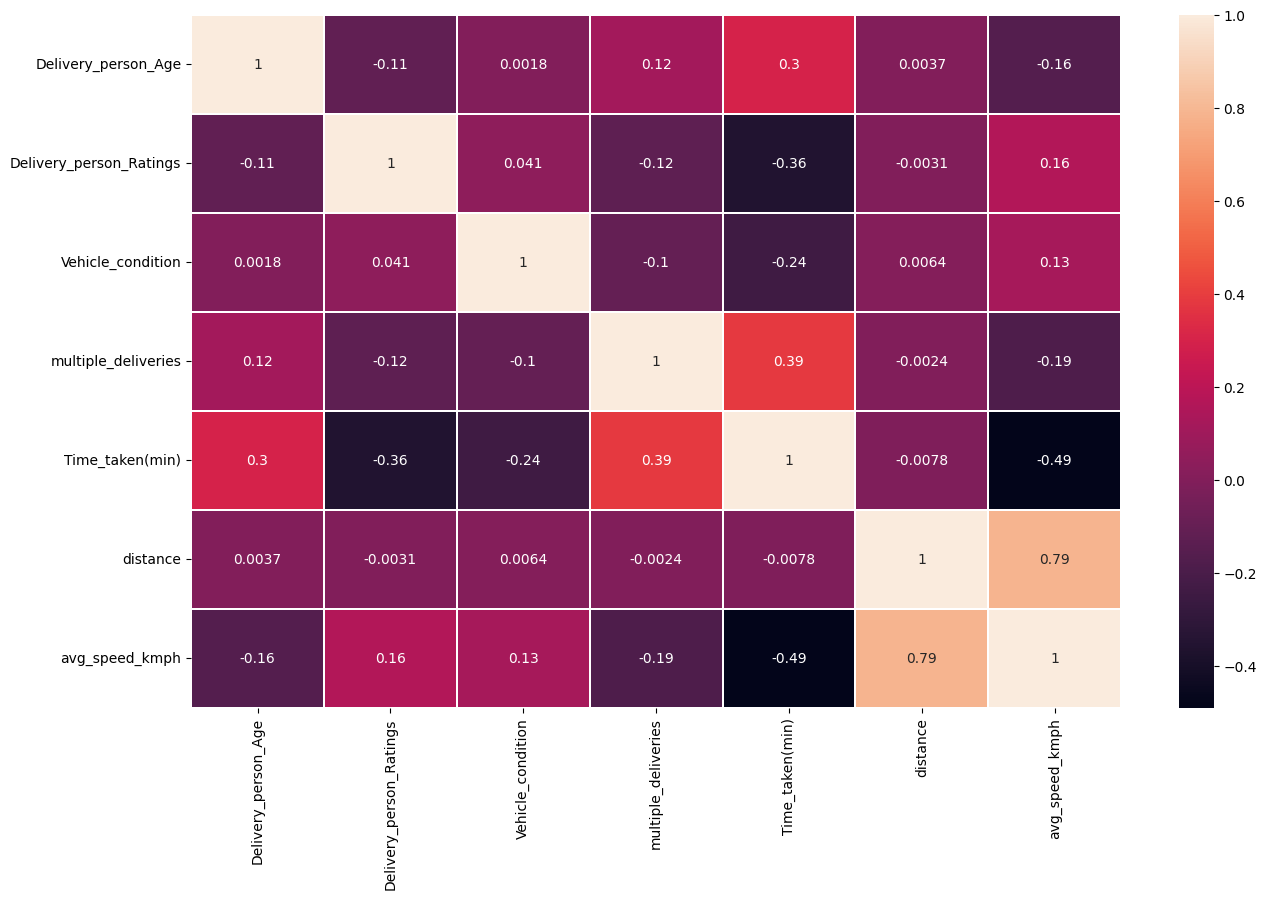

In [143]:
# Correlation HeatMap

plt.figure(figsize=(15,9))

sns.heatmap(edal_df.corr(), annot=True, linewidth=0.1)
plt.show()

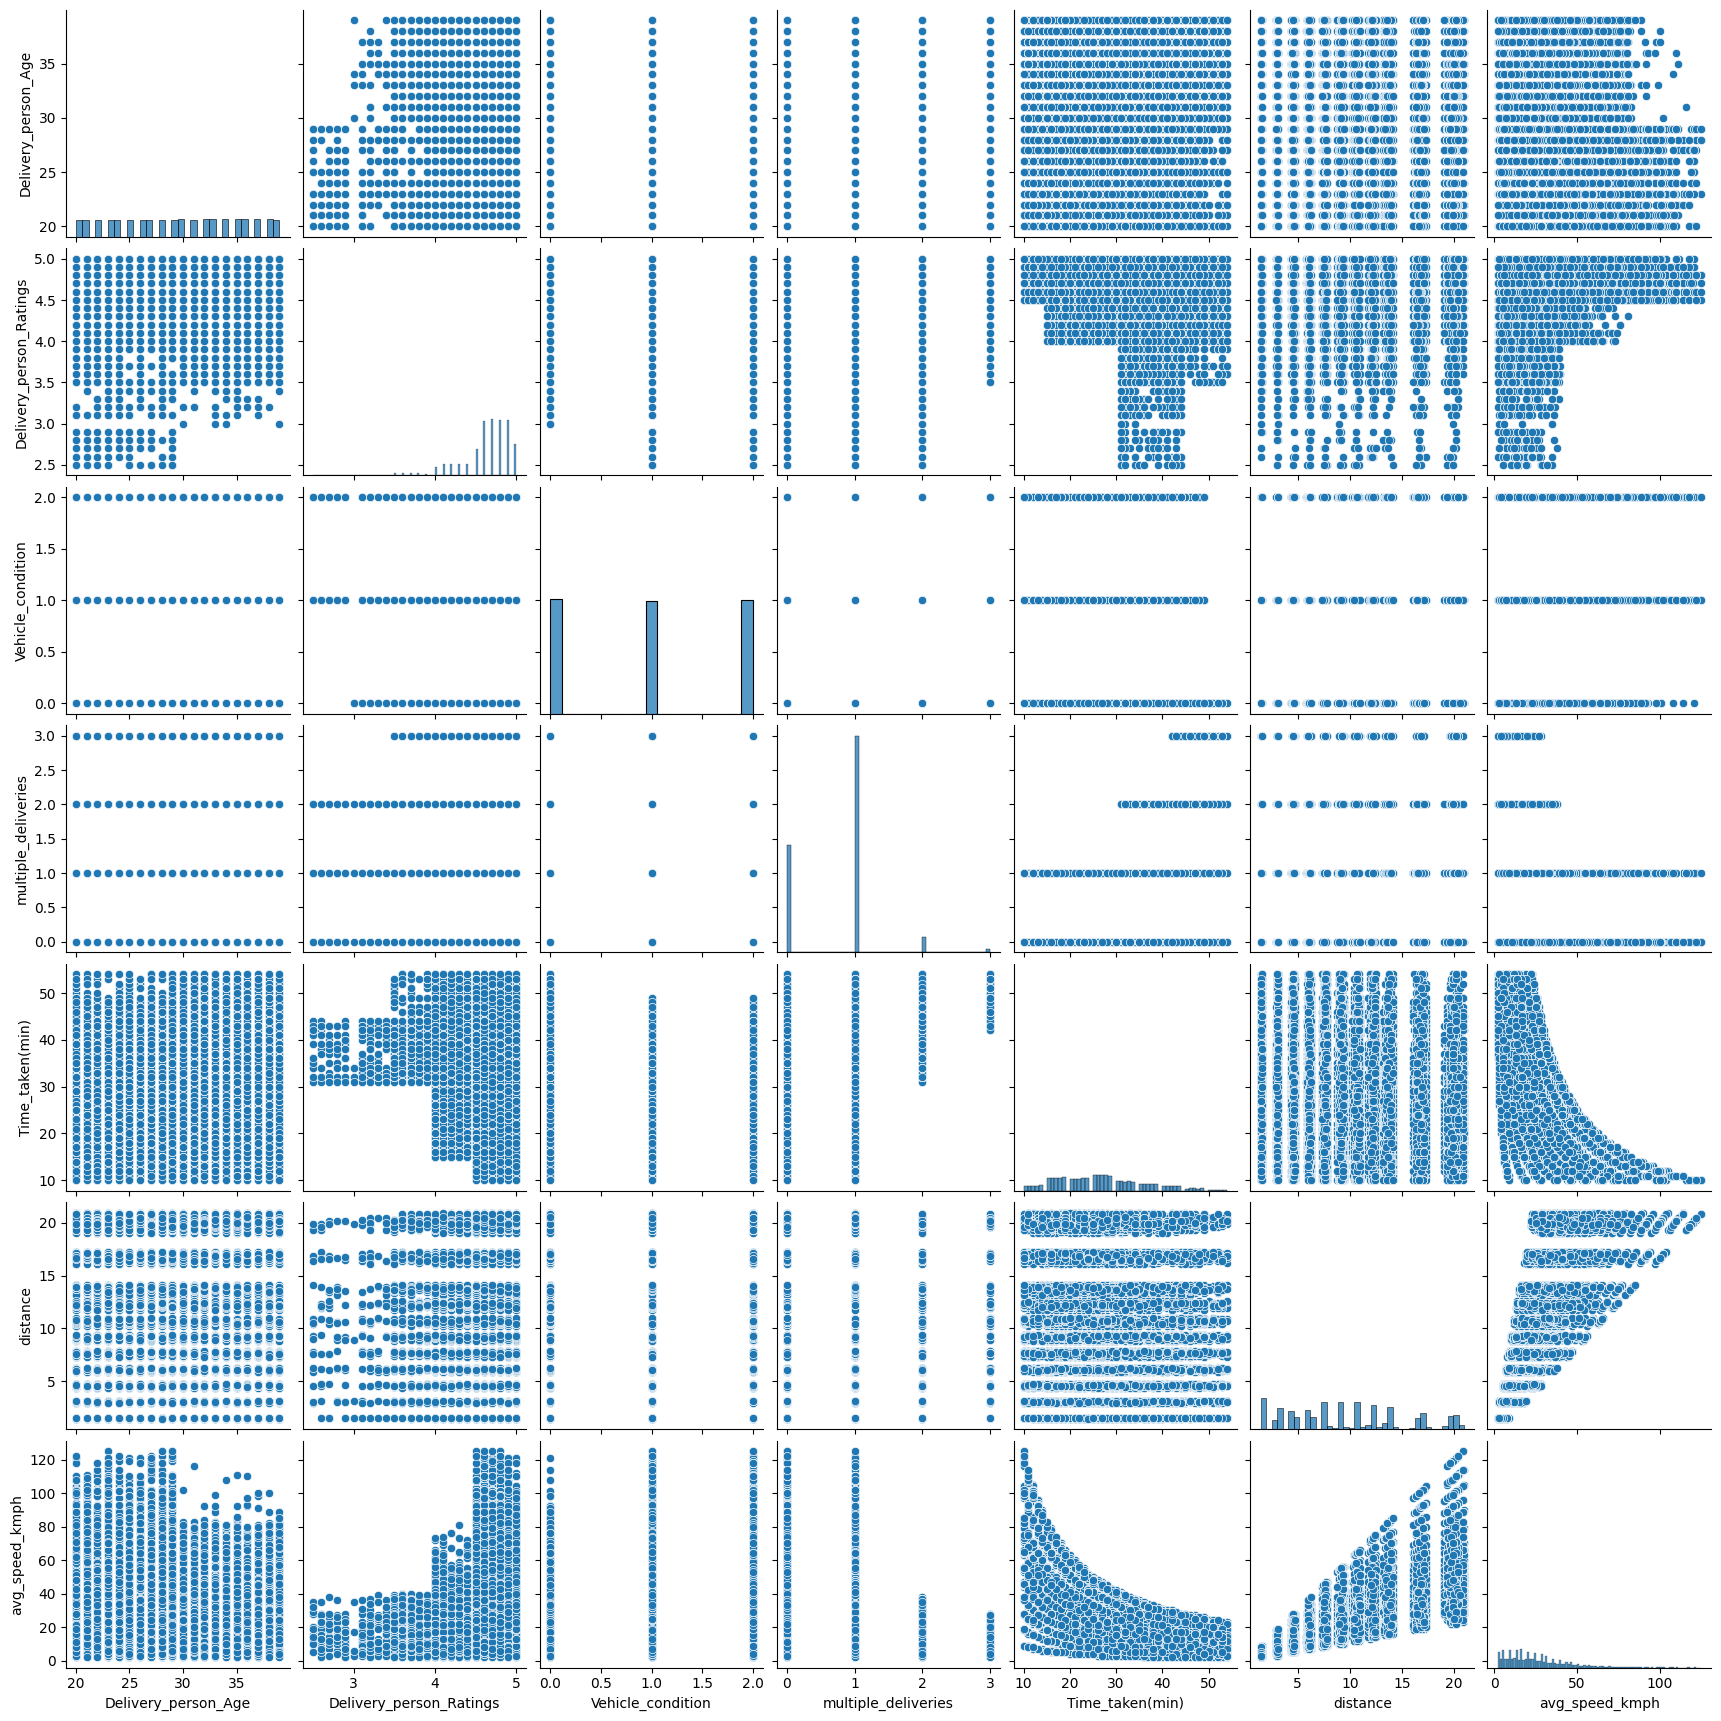

In [144]:
# Pair Plots

sns.pairplot(edal_df)

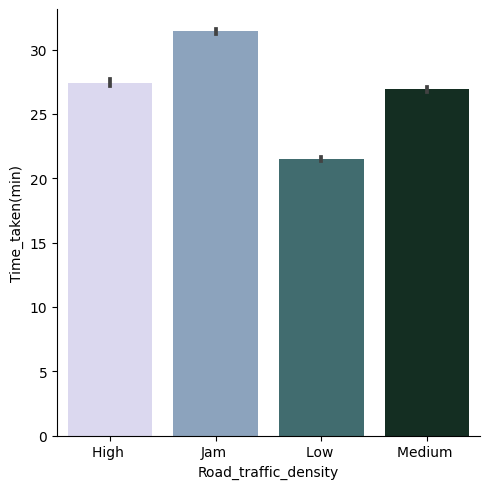

In [145]:
sns.catplot(x="Road_traffic_density", 
            y="Time_taken(min)",
            kind="bar",
            palette="ch:5", 
            data=edal_df)

In [146]:
# Difference between average speeds of under 30 and over 30 drivers

under_30 = edal_df[ edal_df['Delivery_person_Age'] < 30]['avg_speed_kmph'].mean()
above_30 = edal_df[ edal_df['Delivery_person_Age'] >= 30]['avg_speed_kmph'].mean()

print(f'Average speed of persons under 30: {round(under_30,2)} kmph')
print(f'Average speed of persons above 30: {round(above_30,2)} kmph')

Average speed of persons under 30: 28.79 kmph
Average speed of persons above 30: 21.7 kmph


In [147]:
#The average delivery speed of delivery persons under the age of 30 is about 25% more than of those above the age of 30

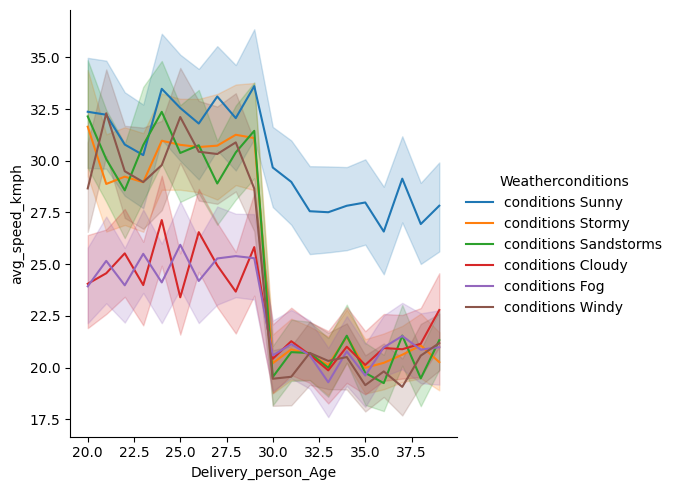

In [148]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Weatherconditions',kind = 'line')

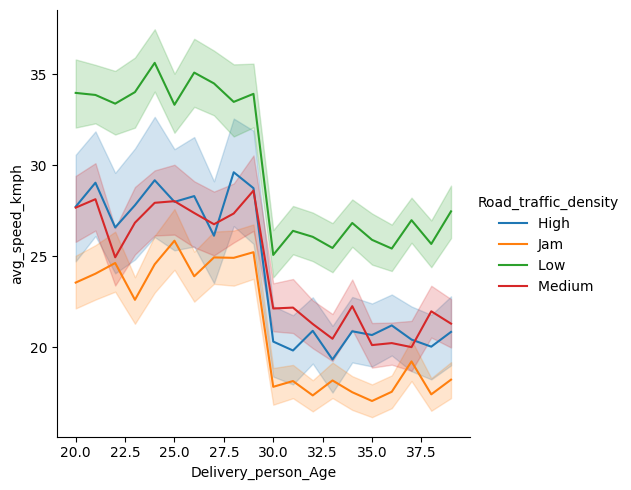

In [149]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

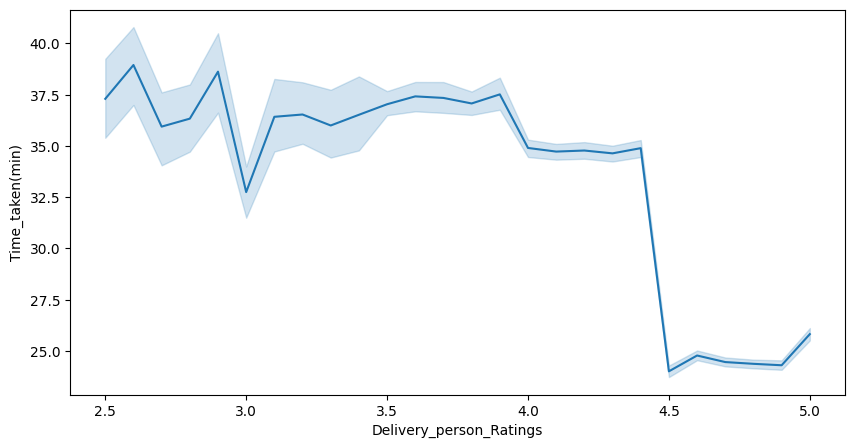

In [150]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="Time_taken(min)", data=edal_df)
plt.show()

In [151]:
pdsl_df = df_train.copy()
pdsl_df = pdsl_df.drop(columns = ['ID', 'Delivery_person_ID','Order_Date'] )
pdsl_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance,avg_speed_kmph
0,37.0,4.9,conditions Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24.0,3.02,8.0
1,34.0,4.5,conditions Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33.0,20.14,37.0
2,23.0,4.4,conditions Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26.0,1.55,4.0
3,38.0,4.7,conditions Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.77,22.0
4,32.0,4.6,conditions Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30.0,6.20,12.0


In [152]:
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries','Time_taken(min)']
for col in num_cols:
    pdsl_df[col]=pdsl_df[col].astype('float64')


In [153]:
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Weatherconditions','Road_traffic_density','Type_of_order',
                                          'Type_of_vehicle', 'City'])
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Festival'], drop_first=True)

In [154]:
features = pdsl_df.drop('Time_taken(min)', axis =1)
label = pdsl_df['Time_taken(min)'].copy()

In [155]:
features = pdsl_df.drop('Time_taken(min)', axis =1)
label = pdsl_df['Time_taken(min)'].copy()


In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [157]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(26181, 27) (11221, 27) (26181,) (11221,)


In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt

model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_dtr = DecisionTreeRegressor()

models = {'Linear Regression':model_lr, 'Random Forest Regression': model_rf, 'Gradient Boosting Regressor':model_gbr, 
          'Decision Tree Regressor': model_dtr}
for i in models.keys():
  print(i)
  models[i].fit(x_train, y_train)
  y_pred = models[i].predict(x_test)
  print("Accuracy in training dataset: ", (models[i].score(x_train, y_train)*100))
  print("Accuracy in testing dataset: ", models[i].score(x_test, y_test)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
  print('--------------------------------------')
     


Linear Regression
Accuracy in training dataset:  75.80354900679541
Accuracy in testing dataset:  75.50097200868402
RMSE value:  4.5982283025296695
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.63409798537218
Accuracy in testing dataset:  97.51810209821757
RMSE value:  1.4635516687527714
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  93.92322717447816
Accuracy in testing dataset:  93.64231385638568
RMSE value:  2.3424247360049693
--------------------------------------
Decision Tree Regressor
Accuracy in training dataset:  99.99995633967362
Accuracy in testing dataset:  95.1002408118138
RMSE value:  2.0563804732018593
--------------------------------------


In [159]:
#Hence the best model is Random Forest Regressor
# lowest rmse and highest acc on testing data
print('Random Forest Regression')
print("Accuracy in training dataset: ", (model_rf.score(x_train, y_train)*100))
print("Accuracy in testing dataset: ", model_rf.score(x_test, y_test)*100)
print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
y_pred=model_rf.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=pdsl_df.copy().merge(out,left_index=True,right_index=True)
out[['Delivery_person_Ratings','actual','predicted']].sample(10)

Random Forest Regression
Accuracy in training dataset:  99.63409798537218
Accuracy in testing dataset:  97.51810209821757
RMSE value:  2.0563804732018593


,Delivery_person_Ratings,actual,predicted
40875,4.5,16.0,15.99
9507,2.7,37.0,34.14
34776,4.9,26.0,23.70
8795,4.7,16.0,15.15
14519,4.1,35.0,33.91
9790,5.0,11.0,11.07
9353,4.7,22.0,22.30
40250,4.8,30.0,30.54
21255,4.9,15.0,15.48
9469,4.8,17.0,17.00
